In [1]:
import json
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tweets_path = 'donald_data.json'

tweets_data = []
tweets_file = open(tweets_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweet['full_text'] = re.sub(r"http\S+", "", tweet['full_text'])
        if tweet['full_text'] != "":
            tweets_data.append(tweet)
    except:
        continue

tweets = pd.DataFrame(data=[tweet['full_text'] for tweet in tweets_data], columns=['Text'])
tweets['Time'] = np.array([tweet['created_at'] for tweet in tweets_data])
tweets['Likes'] = np.array([tweet['favorite_count'] for tweet in tweets_data])
tweets['RTs'] = np.array([tweet['retweet_count'] for tweet in tweets_data])

[Text(0,0,''),
 Text(0,0,'Aug 04'),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'Sep 11')]

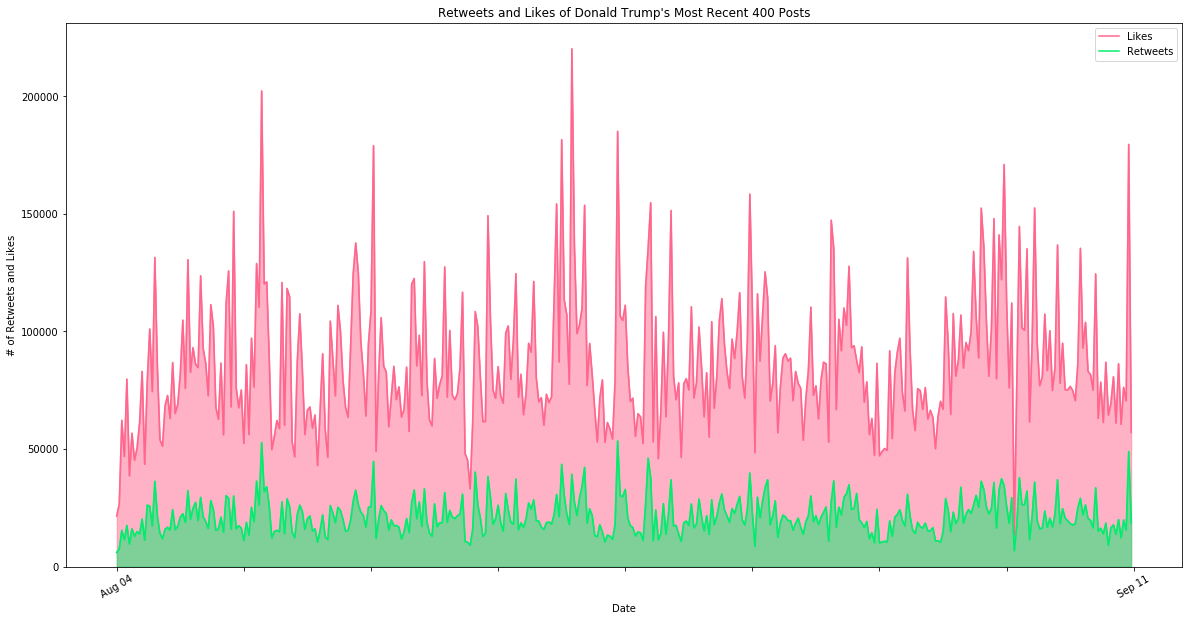

In [4]:

likes = pd.Series(data=tweets[0:400]['Likes'].values, index=tweets[0:400]['Time'])
rt = pd.Series(data=tweets[0:400]['RTs'].values, index=tweets[0:400]['Time'])

plot = likes.plot(figsize=(20,10), color=(1, 0.40, 0.553), label='Likes', legend=True, title="Retweets and Likes of Donald Trump's Most Recent 400 Posts")
rt.plot(figsize=(20,10), color=(0, 0.93, .43), label='Retweets', legend=True)
likes.plot.area(color=(1, 0.40, 0.553), alpha=0.5)
rt.plot.area(color=(0, 0.93, .43), alpha=0.5)
plot.set_ylabel("# of Retweets and Likes")
plot.set_xlabel("Date")
plot.set_xticklabels(['', 'Aug 04', '', '', '', '', '', '', '', 'Sep 11'], rotation = 30)

In [3]:
likes_max = np.max(tweets['Likes'])
rt_max = np.max(tweets['RTs'])
likes_index_max = tweets[tweets.Likes == likes_max].index[0]
rt_index_max  = tweets[tweets.RTs == rt_max].index[0]
likes_min = np.min(tweets['Likes'])
rt_min = np.min(tweets['RTs'])
likes_index_min = tweets[tweets.Likes ==likes_min].index[0]
rt_index_min  = tweets[tweets.RTs == rt_min].index[0]

print("The most liked Tweet, with {} likes: {}\n".format(tweets['Likes'][likes_index_max], tweets['Text'][likes_index_max]))
print("The most retweeted Tweet, with {} retweets: {}\n".format(tweets['RTs'][rt_index_max], tweets['Text'][rt_index_max]))
print("The least liked Tweet, with {} likes: {}\n".format(tweets['Likes'][likes_index_min], tweets['Text'][likes_index_min]))
print("The least retweeted Tweet, with {} retweets: {}\n".format(tweets['RTs'][rt_index_min], tweets['Text'][rt_index_min]))

The most liked Tweet, with 329349 likes: To Iranian President Rouhani: NEVER, EVER THREATEN THE UNITED STATES AGAIN OR YOU WILL SUFFER CONSEQUENCES THE LIKES OF WHICH FEW THROUGHOUT HISTORY HAVE EVER SUFFERED BEFORE. WE ARE NO LONGER A COUNTRY THAT WILL STAND FOR YOUR DEMENTED WORDS OF VIOLENCE &amp; DEATH. BE CAUTIOUS!

The most retweeted Tweet, with 111066 retweets: They just didn't get it, but they do now! 

The least liked Tweet, with 13621 likes: @LindseyGrahamSC  “Why didn’t the FBI tell President Trump that they had concerns about Carter Page? Is there a double standard here?” They told Senator Diane Feinstein that she had a spy - but not Trump. Is that entrapment or did they just want to use Page as an excuse to SPY?

The least retweeted Tweet, with 5086 retweets: The legendary Gary Player at Turnberry in Scotland! 

